In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

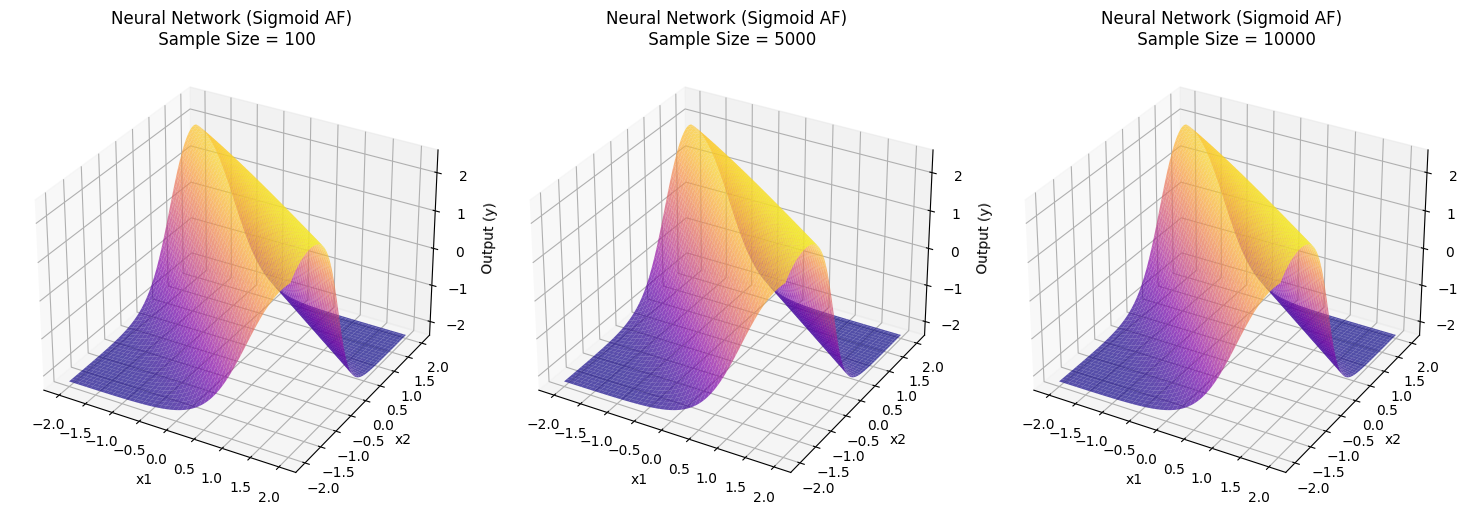

In [5]:
#Define Sigmoid Activation Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Define Neural Network
V_T = np.array([[-2.69, -2.80], [-3.39, -4.56]])
bv = np.array([-2.21, 4.76])
W = np.array([[-4.91], [4.95]])
bw = -2.28

#Define the domain
x1_values = np.linspace(-2, 2, 100)
x2_values = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)

#Set sample sizes
sample_sizes = [100, 5000, 10000]

#Set plot size
fig = plt.figure(figsize=(15, 5))

#Loop through sample sizes and randomize data points
for i, sample_size in enumerate(sample_sizes):
    x1_samples = np.random.uniform(-2, 2, sample_size)
    x2_samples = np.random.uniform(-2, 2, sample_size)
    y_sigmoid = np.zeros(X1.shape)

    #Calculate NN's output for each sample
    for j in range(X1.shape[0]):
        for k in range(X1.shape[1]):
            x1 = X1[j, k]
            x2 = X2[j, k]
            z1 = np.dot(V_T, np.array([x1, x2])) + bv
            a1 = sigmoid(z1)
            z2 = np.dot(W.T, a1) + bw
            y_sigmoid[j, k] = z2

    #Plot for each sample size; used 3D Surface Plot for X, Y, Z variables
    ax = fig.add_subplot(1, len(sample_sizes), i + 1, projection='3d')
    ax.plot_surface(X1, X2, y_sigmoid, cmap='plasma', alpha=0.7)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Output (y)')
    ax.set_title(f'Neural Network (Sigmoid AF) \n Sample Size = {sample_size}')

plt.tight_layout()
plt.show()

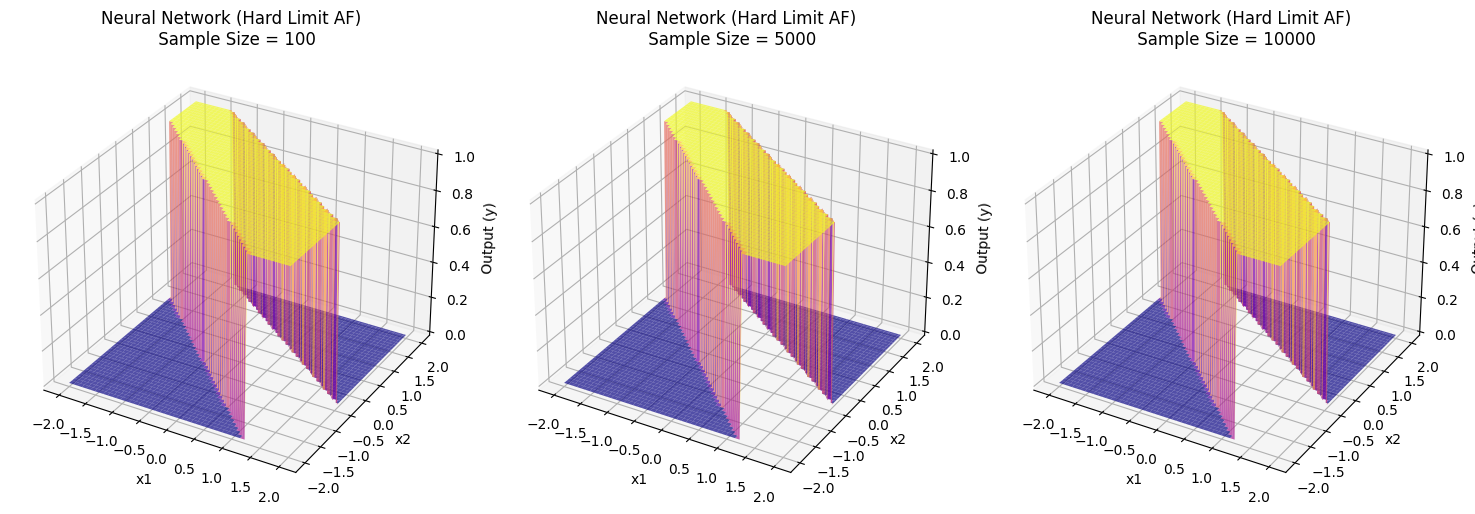

In [7]:
#Define Hard Limit Activation Function
def hard_limit(z):
    return 1 if z >= 0 else 0

#Define Neural Network
V_T = np.array([[-2.69, -2.80], [-3.39, -4.56]])
bv = np.array([-2.21, 4.76])
W = np.array([[-4.91], [4.95]])
bw = -2.28

#Define the domain
x1_values = np.linspace(-2, 2, 100)
x2_values = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)

#Set sample sizes
sample_sizes = [100, 5000, 10000]

#Set plot size
fig = plt.figure(figsize=(15, 5))

#Loop through sample sizes and randomize data points
for i, sample_size in enumerate(sample_sizes):
    x1_samples = np.random.uniform(-2, 2, sample_size)
    x2_samples = np.random.uniform(-2, 2, sample_size)
    y_hard_limit = np.zeros(X1.shape)

    #Calculate NN's output for each sample
    for j in range(X1.shape[0]):
        for k in range(X1.shape[1]):
            x1 = X1[j, k]
            x2 = X2[j, k]
            z1 = np.dot(V_T, np.array([x1, x2])) + bv
            a1 = np.array([hard_limit(z) for z in z1])
            z2 = np.dot(W.T, a1) + bw
            y_hard_limit[j, k] = hard_limit(z2)

    #Plot for each sample size; used 3D Surface Plot for X, Y, Z variables
    ax = fig.add_subplot(1, len(sample_sizes), i + 1, projection='3d')
    ax.plot_surface(X1, X2, y_hard_limit, cmap='plasma', alpha=0.7)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Output (y)')
    ax.set_title(f'Neural Network (Hard Limit AF) \n Sample Size = {sample_size}')

plt.tight_layout()
plt.show()

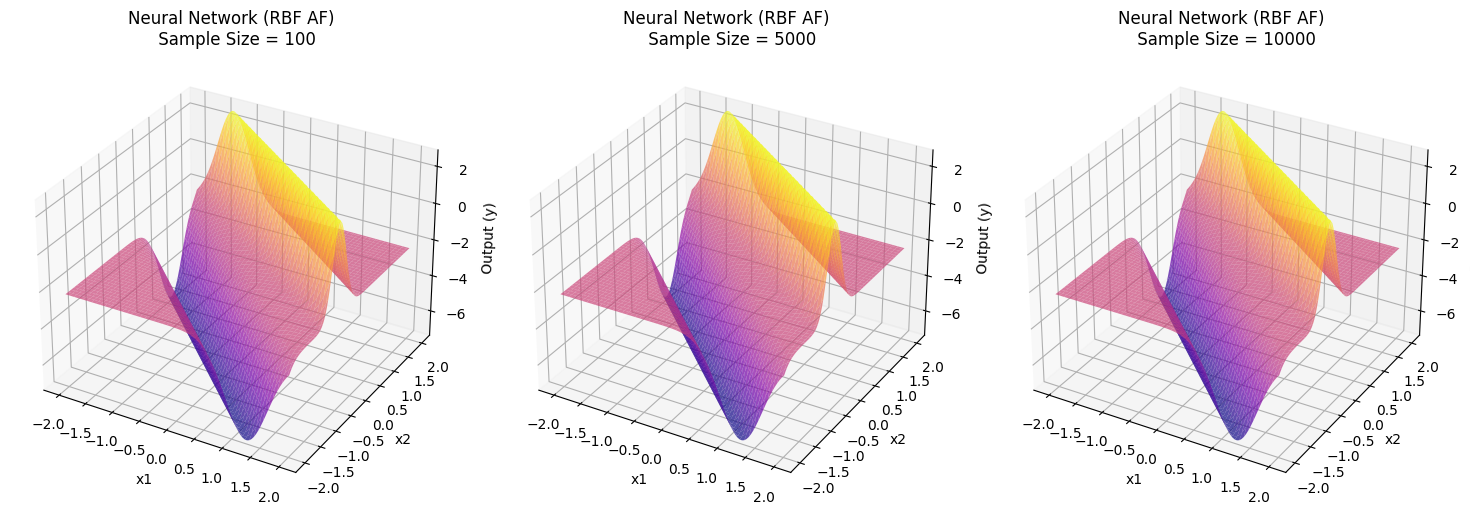

In [9]:
#Define Radial Basis Activation Function
def radial_basis(x, c, sigma):
    return np.exp(-0.5 * ((x - c) / sigma) ** 2)

#Define Neural Network
Vt = np.array([[-2.69, -2.80], [-3.39, -4.56]])
bv = np.array([-2.21, 4.76])
W = np.array([[-4.91], [4.95]])
bw = -2.28

#Define the domain
x1_values = np.linspace(-2, 2, 100)
x2_values = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_values, x2_values)

#Set Sample Sizes
sample_sizes = [100, 5000, 10000]

#Set Plot Size
fig = plt.figure(figsize=(15, 5))

#Loop through sample sizes and randomize data points
for i, sample_size in enumerate(sample_sizes):
    x1_samples = np.random.uniform(-2, 2, sample_size)
    x2_samples = np.random.uniform(-2, 2, sample_size)
    y_radial_basis = np.zeros(X1.shape)

    #Calculate NN's output for each sample
    for j in range(X1.shape[0]):
        for k in range(X1.shape[1]):
            x1 = X1[j, k]
            x2 = X2[j, k]
            z1 = np.dot(Vt, np.array([x1, x2])) + bv
            #Set RBF's center to 0 and sigma to 1 for simplicity
            a1 = np.array([radial_basis(z, 0, 1) for z in z1])  
            z2 = np.dot(W.T, a1) + bw
            y_radial_basis[j, k] = z2

    #Plot for each sample size; used 3D Surface Plot for X, Y, Z variables
    ax = fig.add_subplot(1, len(sample_sizes), i + 1, projection='3d')
    ax.plot_surface(X1, X2, y_radial_basis, cmap='plasma', alpha=0.7)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Output (y)')
    ax.set_title(f'Neural Network (RBF AF) \n Sample Size = {sample_size}')

plt.tight_layout()
plt.show()